### Step 1: Get data and Cleanup

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks


In [2]:
customers_data = pd.read_csv('customer_churn.csv') 

In [3]:
customers_data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [4]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [5]:
#Lets check for invalid input in the Churn column
customers_data['Churn'].unique()

array([1, 0], dtype=int64)

In [6]:
#Lets check for invalid input in the Account manager column
customers_data['Account_Manager'].unique()

array([0, 1], dtype=int64)

In [7]:
#Lets check for duplicated or repeated row 
sum(customers_data.duplicated()) == 0

True

In [8]:
customers_data[customers_data.duplicated(subset='Names',keep=False)]

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
22,Jennifer Wood,35.0,9381.12,1,6.78,11.0,2006-03-27 20:52:42,"1493 Phillips Haven Lake William, FM 00995-2870","Clark, Campbell and Armstrong",1
439,Jennifer Wood,48.0,11585.16,0,4.61,9.0,2012-03-13 03:24:04,Unit 5568 Box 1967 DPO AE 15638,"Gray, Campbell and Chandler",0


There is a repeated name but from the table above, it seems the two names Jennifer Woods is for two different people

In [9]:
customers_data['Churn'].value_counts()

0    750
1    150
Name: Churn, dtype: int64

In [10]:
customers_data['Account_Manager'].value_counts()

0    467
1    433
Name: Account_Manager, dtype: int64

In [11]:
customers_data['Age'].value_counts()

41.0    69
43.0    59
40.0    58
45.0    56
44.0    53
38.0    51
42.0    49
39.0    48
37.0    48
46.0    48
36.0    39
48.0    36
35.0    32
49.0    30
47.0    29
34.0    25
51.0    21
52.0    20
32.0    18
33.0    16
50.0    15
55.0    14
31.0    11
30.0    11
29.0     9
53.0     8
54.0     8
56.0     5
28.0     5
26.0     2
58.0     2
27.0     1
65.0     1
60.0     1
25.0     1
22.0     1
Name: Age, dtype: int64

In [12]:
len(customers_data['Company'].unique())

873

The column, company and is not useful because it does not have unique inputs

In [13]:
#dropping column company
not_required_columns = ["Company"]
customers_data.drop(labels = not_required_columns, axis =1, inplace=True)

In [14]:
#creating new feature, annual_total_purchase
customers_data['annual_total_purchase']=customers_data['Total_Purchase']/customers_data['Years']

The onboard column is better when it is in year 

In [15]:
date=customers_data['Onboard_date'].str.split('-',expand=True)
date=date.rename(columns={0:'year'})
date

,year,1,2
0,2013,08,30 07:00:40
1,2013,08,13 00:38:46
2,2016,06,29 06:20:07
3,2014,04,22 12:43:12
4,2016,01,19 15:31:15
...,...,...,...
895,2007,12,01 13:29:34
896,2008,12,28 15:23:58
897,2014,06,20 05:10:09
898,2012,05,30 00:15:43


In [16]:
customers_data['Onboard_date']=date['year']
customers_data['Onboard_date']=pd.to_datetime(customers_data['Onboard_date'])

customers_data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Churn,annual_total_purchase
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-01-01,"10265 Elizabeth Mission Barkerburgh, AK 89518",1,1532.797784
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-01-01,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",1,1833.264615
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-01-01,"1331 Keith Court Alyssahaven, DE 90114",1,1931.746627
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-01-01,"13120 Daniel Mount Angelabury, WY 30645-4695",1,1193.853949
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-01,"765 Tricia Row Karenshire, MH 71730",1,1653.161871


### Step 2: Explore Data (asking useful questions)

In other as to examine our data and turn it into useful piece of information, the following statistical research questions and methods will be employed.

**Statistical Research Questions**
- 1. Does number of sites affect churn?
- 2. Does account manager affect churn?
- 3. Does age affect churn?
- 4. Does year affect churn?
- 5. Does Total_Purchase affect churn?
- 6. Does Onboard_date affect churn?
- 7. Which features strongly affects churn?
- 8. can we use a new feature, annual total purchase to predict churn?
- 9. Can we predict car churn based on the available features ?


**Does age affect churn?**

In [17]:
def churn_ratio(col):
    # here we calculate the churn ratio for each value in  col
    d = {}
    for val in customers_data[col].unique():
        a = customers_data[customers_data[col] == val]['Churn'].count()
        b = customers_data[customers_data[col]==val]['Churn'].sum()
        d[val] = [a, b, round(b/a*100, 2)]

    p=pd.DataFrame.from_dict(d, orient='index').rename(columns = {0: f'uniq_count_{customers_data[col].name}', 1: 'num_of_Churn',2: 'churn_ratio'}).sort_values(by=['churn_ratio'], ascending=False)
    return p

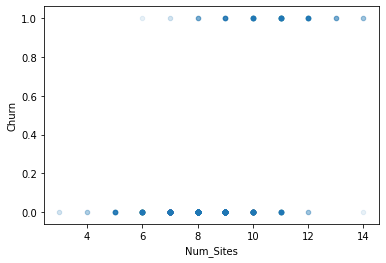

In [18]:
customers_data.plot.scatter(x="Num_Sites", y="Churn", alpha=0.1)
plt.show()

In [19]:
#for people with number of sites less than 8
customers_data[customers_data["Num_Sites"]<8]['Churn'].value_counts()

0    238
1      3
Name: Churn, dtype: int64

In [20]:
#for people with number of sites greater than and less than 12
customers_data[(customers_data["Num_Sites"]>8)&(customers_data["Num_Sites"]<12)]['Churn'].value_counts()

0    301
1     99
Name: Churn, dtype: int64

In [21]:
#for people with number of sites greater than 12
customers_data[customers_data["Num_Sites"]>12]['Churn'].value_counts()

1    13
0     1
Name: Churn, dtype: int64

In [22]:
# here we calculate the churn ratio for each value in Num_Sites
churn_ratio('Num_Sites')

,uniq_count_Num_Sites,num_of_Churn,churn_ratio
13.0,8,8,100.00
12.0,32,27,84.38
14.0,6,5,83.33
11.0,83,46,55.42
10.0,131,34,25.95
9.0,186,19,10.22
8.0,213,8,3.76
6.0,67,1,1.49
7.0,146,2,1.37
5.0,22,0,0.00


**Observations**
- Number of sites affects churn very well. 
- Poeple that visited less websites did not usually churn while those that visited more websites usually churn 
- Only 3 people churn out of 241 people with less than 8 visited sites
- Only 1 person did not churn out 14 people with greater than 12 visited sites
- The more the number of websites visited the more thre tendency of churning

**Does account manager affect churn?**


In [23]:
# here we calculate the churn ratio for each value in Account_Manager
churn_ratio('Account_Manager')

,uniq_count_Account_Manager,num_of_Churn,churn_ratio
1,433,84,19.40
0,467,66,14.13


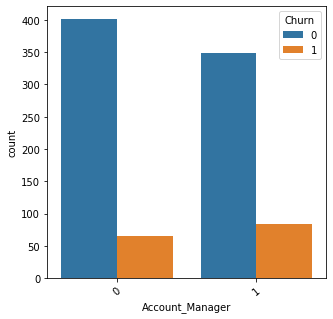

In [24]:
# plotting the counplot w.r.t. the target variable
fig, axs = plt.subplots(figsize = (5,5))
sns.countplot(x = "Account_Manager", 
              hue = "Churn", 
              data = customers_data, 
              order = customers_data['Account_Manager'].value_counts().index
             )
xticks(rotation = 40)
plt.show()

In [25]:
def view_cat(df,col,hue):
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
    if len(temp.unique()) > 0:
        for p in ax.patches:
            ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(customers_data))), (p.get_x()+0.05, p.get_height()+20))  
    
    else:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
    del temp


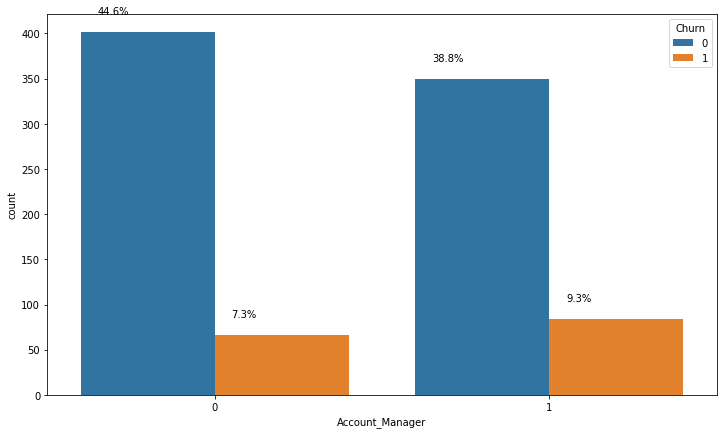

In [26]:
view_cat(customers_data,'Account_Manager','Churn')

**Observations**
- people with account manager stands a 19% chance of churning. 
- people without account manager stands a 14% chance of churning. 
- Hence people with account manager churn the most


**Does age affect churn?**


In [27]:
def view_con(df,col,hue):

    sns.set(style="darkgrid")
    
    fig, ax=plt.subplots(nrows =2,ncols=3,figsize=(20,8))
    ax[0][0].set_title("churn = 1")    
    ax[0][1].set_title("churn = 1")
    ax[0][2].set_title("churn = 1")
    sns.distplot(df[df[hue]==1][col],ax=ax[0][0])
    sns.violinplot(data =df[df[hue]==1], x=col,ax=ax[0][1], inner="quartile")
    sns.boxplot(data =df[df[hue]==1], x=col,ax=ax[0][2],orient='v')
    
    ax[1][0].set_title("churn = 0")        
    ax[1][1].set_title("churn = 0")
    ax[1][2].set_title("churn = 0")

    sns.distplot(df[df[hue]==0][col],ax=ax[1][0])
    sns.violinplot(data =df[df[hue]==0], x=col,ax=ax[1][1], inner="quartile")
    sns.boxplot(data =df[df[hue]==0], x=col,ax=ax[1][2],orient='v')
    

In [28]:
def view_con1(df,col,hue):

    sns.set(style="darkgrid")
    
    fig, axs = plt.subplots(2,2,figsize = (20,6.5))
    axs[0][0].set_title("churn = 1")    
    axs[0][1].set_title("churn = 1")
    axs[1][0].set_title("churn = 0")        
    axs[1][1].set_title("churn = 0")
    sns.boxplot(df[df['Churn']==1][col], ax = axs[0][0])
    df[df['Churn']==1][col].plot.hist(bins=20, ax = axs[0][1])
    sns.boxplot(df[customers_data['Churn']==0][col], ax = axs[1][0])
    df[df['Churn']==0][col].plot.hist(bins=20, ax = axs[1][1])
    plt.show()
   

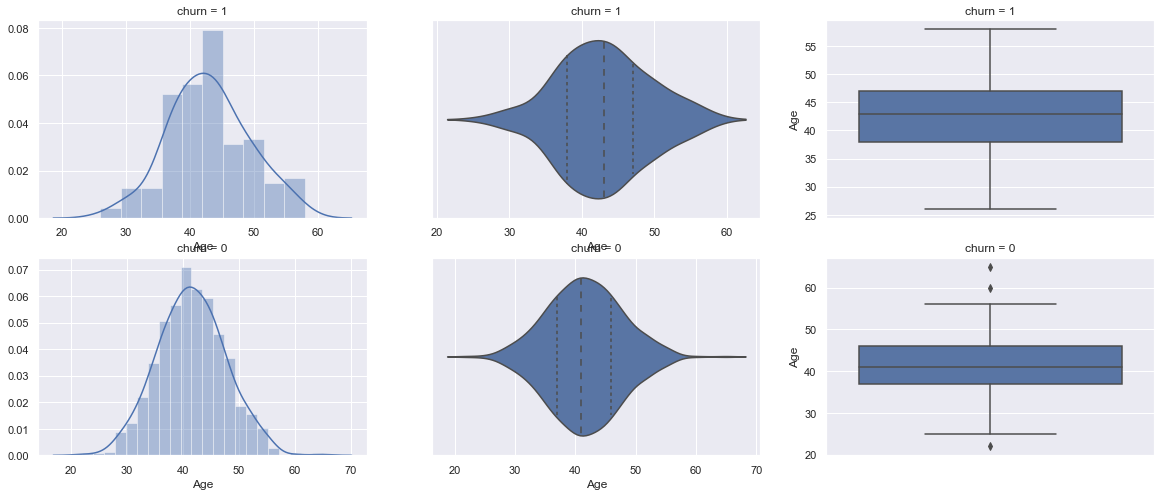

In [29]:
view_con(customers_data,'Age','Churn')

In [30]:
customers_data[customers_data['Churn']==0]['Age'].describe()

count    750.000000
mean      41.581333
std        6.071507
min       22.000000
25%       37.000000
50%       41.000000
75%       46.000000
max       65.000000
Name: Age, dtype: float64

In [31]:
customers_data[customers_data['Churn']==1]['Age'].describe()

count    150.000000
mean      42.993333
std        6.289969
min       26.000000
25%       38.000000
50%       43.000000
75%       47.000000
max       58.000000
Name: Age, dtype: float64

**Observations**
- The mean age of people that churn is a bit higher than the mean of those that did not churn. 
- The min, 25%, 50% and 75% percentile and max of those that churn is more than those that did not churn. 
- From the observations, older individuals has more tendency of churning.


- 4. Which features strongly affects churn?


**Does year affect churn?**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


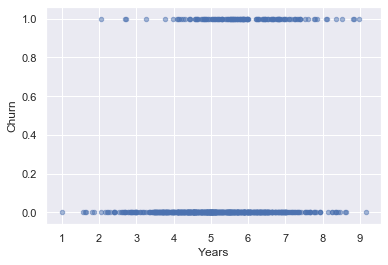

In [32]:
customers_data.plot.scatter(x="Years", y="Churn", alpha=0.5)
plt.show()

In [33]:
#for people with number of sites less than 4
customers_data[customers_data["Years"]<4]['Churn'].value_counts()

0    128
1      6
Name: Churn, dtype: int64

In [34]:
#for people with years greater than4 and less than 8
customers_data[(customers_data["Years"]>4)&(customers_data["Years"]<8)]['Churn'].value_counts()


0    609
1    137
Name: Churn, dtype: int64

In [35]:
#for people with years greater than 8
customers_data[customers_data["Years"]>8]['Churn'].value_counts()

0    11
1     7
Name: Churn, dtype: int64

In [36]:
 def scatter_churn(df,x,y):
    color=['c','r']
    for n in range(len(df)):
        plt.scatter(x=df[x][n], 
                     y=df[y][n],
                     color=color[customers_data["Churn"][n]],
                     alpha=0.2)
    plt.xlabel(df[x].name) # Set text for the x axis
    plt.ylabel(df[y].name)
    plt.show()

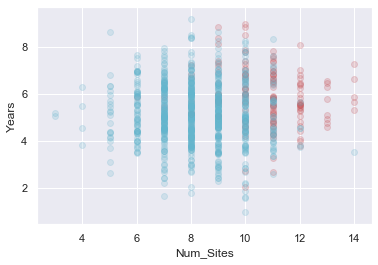

In [37]:
scatter_churn(customers_data,"Num_Sites","Years")     

**Observations** 
- Poeple that has lesser year do not usually churn while those that has more year usually churn. 
- Only 6 people churn out of 134 people with less than 4 years.
- Only 11 person did not churn out 18 people with greater than 8 year. 

**Does Total_Purchase affect churn?**

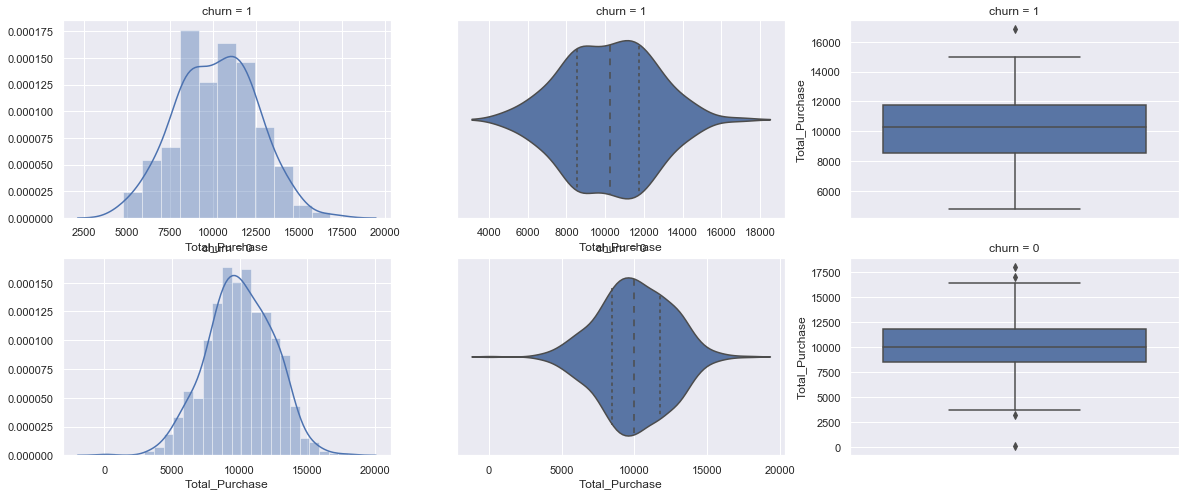

In [38]:
view_con(customers_data,'Total_Purchase','Churn')

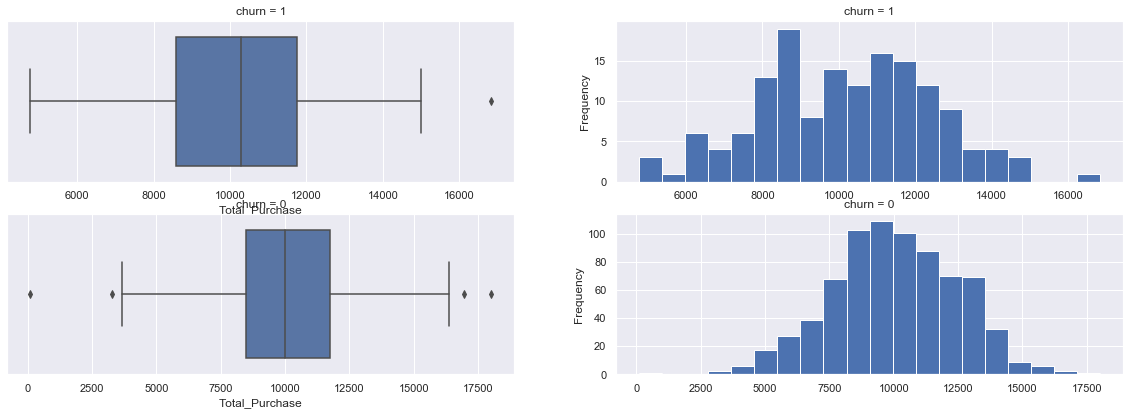

In [39]:
view_con1(customers_data,'Total_Purchase','Churn')

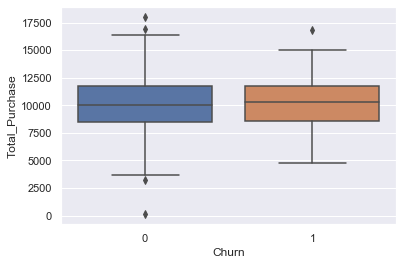

In [40]:
# plotting boxplot w.r.t. the target variable
sns.boxplot(y = 'Total_Purchase', x = 'Churn', data = customers_data)
plt.show()

In [41]:
customers_data[customers_data['Churn']==1]['Total_Purchase'].describe()

count      150.000000
mean     10192.179933
std       2283.594792
min       4771.650000
25%       8572.682500
50%      10273.760000
75%      11754.017500
max      16838.940000
Name: Total_Purchase, dtype: float64

In [42]:
customers_data[customers_data['Churn']==0]['Total_Purchase'].describe()

count      750.000000
mean     10036.952853
std       2433.519860
min        100.000000
25%       8477.082500
50%       9999.705000
75%      11762.277500
max      18026.010000
Name: Total_Purchase, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


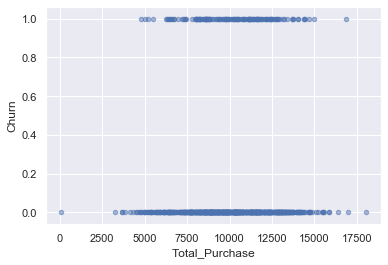

In [43]:
customers_data.plot.scatter(x="Total_Purchase", y="Churn", alpha=0.5)
plt.show()

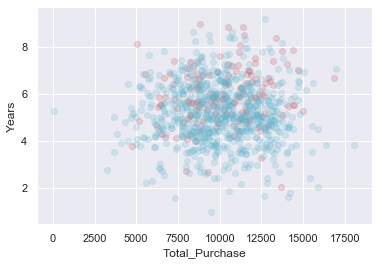

In [44]:
scatter_churn(customers_data,"Total_Purchase","Years")     

**Observations**
- The mean Total_Purchase for people that churn is a bit higher than the mean Total_Purchase for those that did not churn. 
- people that spent less than 4700 do not churn.

**Does Onboard_date affect churn?**


In [45]:
customers_data['Onboard_date'].value_counts()

2014-01-01    103
2006-01-01    102
2007-01-01     90
2010-01-01     84
2009-01-01     84
2013-01-01     80
2008-01-01     76
2015-01-01     75
2011-01-01     72
2012-01-01     67
2016-01-01     67
Name: Onboard_date, dtype: int64

In [46]:
Onboard=churn_ratio('Onboard_date')
Onboard

,uniq_count_Onboard_date,num_of_Churn,churn_ratio
2008-01-01,76,17,22.37
2011-01-01,72,15,20.83
2010-01-01,84,16,19.05
2007-01-01,90,17,18.89
2015-01-01,75,14,18.67
2006-01-01,102,19,18.63
2016-01-01,67,11,16.42
2012-01-01,67,11,16.42
2013-01-01,80,10,12.50
2009-01-01,84,9,10.71


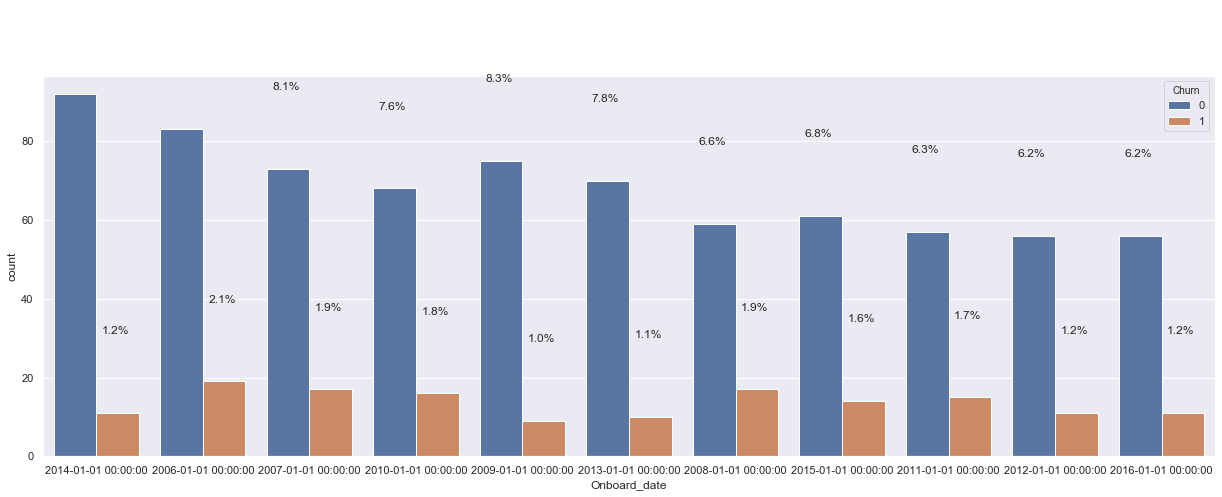

In [47]:
view_cat(customers_data,'Onboard_date','Churn')

In [48]:
Onboard=Onboard.sort_index()

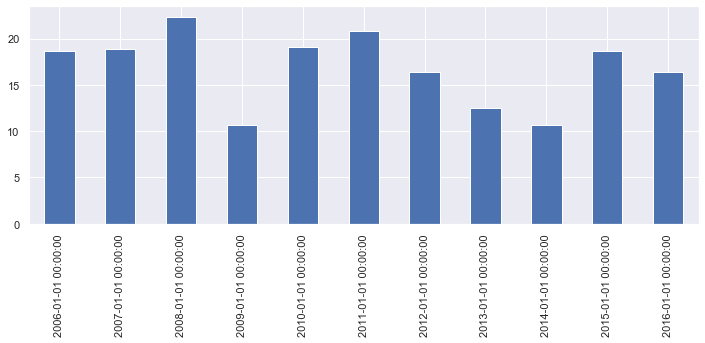

In [49]:
Onboard['churn_ratio'].plot.bar(figsize=(12, 4))

**Observations**
- The churn rate for people onboard in 2008 is the highest rate ever, that means a lot of customers was lost that year. 
- The churn rate was decreased gradually from 2011 to 2014 and it inccreased drastically in 2015.
- The highest churn rate yearly decrease percentage was in 2009.

**Which features strongly affects churn?**

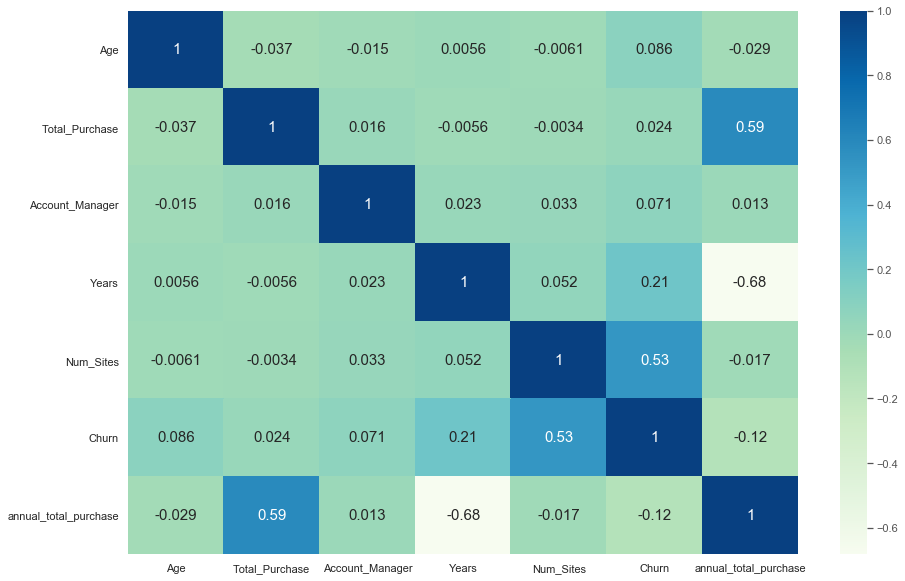

In [50]:
# make a correlation plot (heatmap)
corr_mx = customers_data.corr()
f, ax = plt.subplots(figsize=(15,10))
plt.style.use('ggplot')
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':15}, cmap='GnBu')

**Observation**

- There is a high positive correlation between number of sites  and churn (with rscore of 0.53). 
- The new feature, annual_total_purchase has a very weak negative correlation with  churn, therefore, its not a useful feature.
- Another useful feature is year.
- Num_Sites strongly affects churn.
- years also has a strong positive correlation with churn

**can we use a new feature, annual total purchase to predict churn?**


From the heatmap the new feature, annual total purchase is not good feature for predicting churn.

**Can we predict car churn based on the available features ?**

Yes we can predict churn with:
- 1.Num_Sites
- 2.Years	 
- 3.Age
- 4.Account_Manager	
- 5.Total_Purchase


In [51]:
#dropping columns that are not required for the model
not_required_columns = ['Location','annual_total_purchase','Names']
customers_data.drop(labels = not_required_columns, axis =1, inplace=True)

In [52]:
customers_data.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Churn
0,42.0,11066.80,0,7.22,8.0,2013-01-01,1
1,41.0,11916.22,0,6.50,11.0,2013-01-01,1
2,38.0,12884.75,0,6.67,12.0,2016-01-01,1
3,42.0,8010.76,0,6.71,10.0,2014-01-01,1
4,37.0,9191.58,0,5.56,9.0,2016-01-01,1


In [53]:
#last_column = car_data['price']
#df = car_data.pop('price')
#df['price'] = last_column

df = customers_data.copy()

In [54]:
df.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Churn
0,42.0,11066.80,0,7.22,8.0,2013-01-01,1
1,41.0,11916.22,0,6.50,11.0,2013-01-01,1
2,38.0,12884.75,0,6.67,12.0,2016-01-01,1
3,42.0,8010.76,0,6.71,10.0,2014-01-01,1
4,37.0,9191.58,0,5.56,9.0,2016-01-01,1


In [55]:
# The data is being swamped with data with large absolute values. Hence, the need to scale. 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

# Scale only the input data
input_data = df[['Age','Total_Purchase','Account_Manager', 'Years', 'Num_Sites']].to_numpy()
data_scaled = scaler.fit_transform(input_data)
data_scaled_df = pd.DataFrame (data_scaled, columns = ['Age','Total_Purchase','Account_Manager', 'Years', 'Num_Sites'])

In [56]:
data_scaled_df.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites
0,0.465116,0.611781,0.0,0.763190,0.454545
1,0.441860,0.659166,0.0,0.674847,0.727273
2,0.372093,0.713196,0.0,0.695706,0.818182
3,0.465116,0.441301,0.0,0.700613,0.636364
4,0.348837,0.507173,0.0,0.559509,0.545455


In [57]:
X = data_scaled_df
y = df['Churn']

In [58]:
# split data into train and validation data
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42) 

### Model Development and Evaluation 

**Logistic Regression Model**

In [59]:
from model_parameter_tester import sens_spec_score

In [60]:
from model_parameter_tester import para_m_n_checker

If:
- **Sensitivity(recall)**  is 1, all predicted as won't churn will be correct but there will be a high probability of mispredicting those that won't churn as will churn.


- **Specificity** is 1, all predicted as churn will be correct but there will be a high probability of mispredicting those that churn as won't churn.


- **precision** is 1, all predicted as churn will be correct but there will be a high probability of mispredicting those that churn as won't churn.


- **NPV** is 1, all predicted as won't churn will be correct but there will be a high probability of mispredicting those that won't churn as will churn.


- **Accuracy** is 1, then all that are predicted as churn or not churn are predicted correctly.

In [61]:
mini=[2,25,45,50,75,100,150,200,300,450,500]

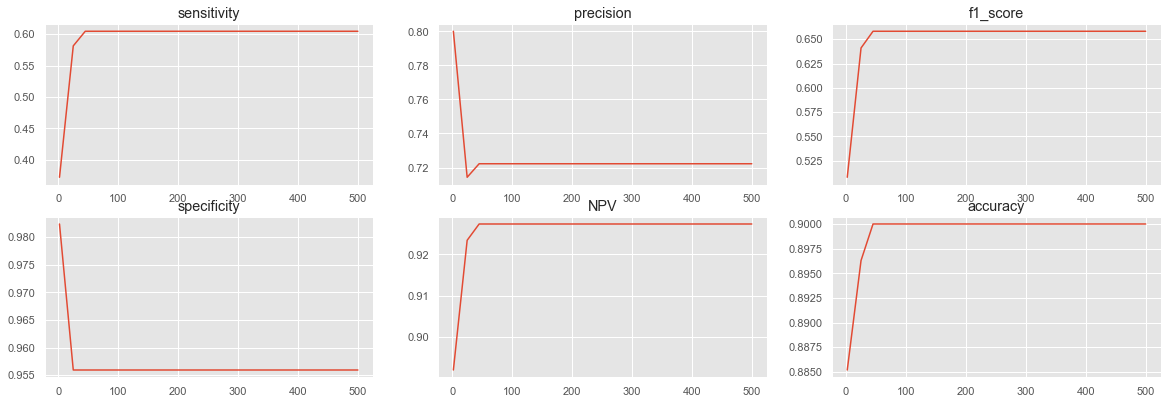

In [62]:
result=para_m_n_checker('lr','C',mini,X_train,y_train,X_valid, y_valid,random_state=80)

**C>= 50 is the best for logistic regression**

In [63]:
from time import time

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=100)
t0 = time()
lr_model.fit(X_train, y_train)
lr_traintime=round(time()-t0, 3)
print("Training Time:",lr_traintime , "s")

t0 = time()
y_pred_lr= lr_model.predict(X_valid)
lr_predicttime=round(time()-t0, 3)
print("prediction Time:",lr_predicttime , "s") 
print('__________________________________________\n')



from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score
lr_f1=f1_score(y_valid, y_pred_lr)
lr_acc=lr_model.score(X_valid, y_valid)
lr_sens,lr_spec,lr_pre,lr_npv=sens_spec_score(y_valid, y_pred_lr)

print('sensitivity: {}'.format(lr_sens))
print('specificity: {}'.format(lr_spec))
print('precision: {}'.format(lr_pre))
print('npv: {}'.format(lr_npv))
print('f1_score: {}'.format(lr_f1))

print('__________________________________________\n')
print('Accuracy on train data: {}'.format(lr_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(lr_acc))

Training Time: 0.013 s
prediction Time: 0.003 s
__________________________________________

sensitivity: 0.6046511627906976
specificity: 0.9559471365638766
precision: 0.7222222222222222
npv: 0.9273504273504274
f1_score: 0.6582278481012659
__________________________________________

Accuracy on train data: 0.8952380952380953
Accuracy on test data: 0.9


**SVM Model**

Rbf

In [64]:
mini=[2,25,45,50,75,100,150,200,300,450,500]

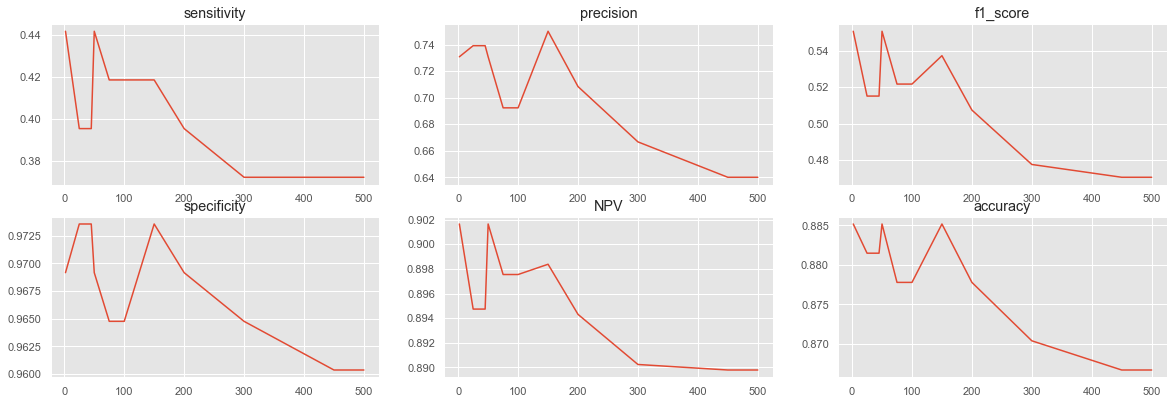

In [65]:
result=para_m_n_checker('svm','C',mini,X_train,y_train,X_valid, y_valid,random_state=45)

**C = 50 is the best for svm C parameter**

In [66]:
from sklearn import svm

svm_model=svm.SVC(kernel='rbf',C=50,random_state=45)
t0 = time()
svm_model .fit(X_train, y_train)
svm_traintime=round(time()-t0, 3)
print("Training Time:",svm_traintime , "s")

t0 = time()
y_pred_svm= svm_model.predict(X_valid)
svm_predicttime=round(time()-t0, 3)
print("prediction Time:",svm_predicttime , "s") 
print('__________________________________________\n')



from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score
svm_f1=f1_score(y_valid, y_pred_svm)
svm_acc=svm_model .score(X_valid, y_valid)
svm_sens,svm_spec,svm_pre,svm_npv=sens_spec_score(y_valid, y_pred_svm)

print('sensitivity: {}'.format(svm_sens))
print('specificity: {}'.format(svm_spec))
print('precision: {}'.format(svm_pre ))
print('npv: {}'.format( svm_npv))
print('f1_score: {}'.format(svm_f1))

print('__________________________________________\n')
print('Accuracy on train data: {}'.format(svm_model .score(X_train, y_train)))
print('Accuracy on test data: {}'.format(svm_acc))

Training Time: 0.026 s
prediction Time: 0.009 s
__________________________________________

sensitivity: 0.4418604651162791
specificity: 0.9691629955947136
precision: 0.7307692307692307
npv: 0.9016393442622951
f1_score: 0.5507246376811594
__________________________________________

Accuracy on train data: 0.9095238095238095
Accuracy on test data: 0.8851851851851852


**Naive Bayes Model**

In [67]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()

t0 = time()
nb_model.fit(X_train, y_train)
nb_traintime=round(time()-t0, 3)
print("Training Time:",nb_traintime , "s")

t0 = time()
y_pred_nb = nb_model.predict(X_valid)
nb_predicttime=round(time()-t0, 3)
print("prediction Time:",nb_predicttime , "s") 
print('__________________________________________\n')



from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score
nb_f1=f1_score(y_valid, y_pred_nb )
nb_acc=nb_model.score(X_valid, y_valid)
nb_sens,nb_spec,nb_pre,nb_npv=sens_spec_score(y_valid, y_pred_nb )

print('sensitivity: {}'.format(nb_sens))
print('specificity: {}'.format(nb_spec))
print('precision: {}'.format(nb_pre))
print('NPV: {}'.format(nb_npv))
print('f1_score: {}'.format(nb_f1))

print('__________________________________________\n')
print('Accuracy on train data: {}'.format(nb_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(nb_acc))

Training Time: 0.005 s
prediction Time: 0.004 s
__________________________________________

sensitivity: 0.5813953488372093
specificity: 0.960352422907489
precision: 0.7352941176470589
NPV: 0.923728813559322
f1_score: 0.6493506493506493
__________________________________________

Accuracy on train data: 0.8968253968253969
Accuracy on test data: 0.9


**Decision Tree Model**

In [68]:
mini=[2,25,45,50,75,100,150,200,300,450,500]

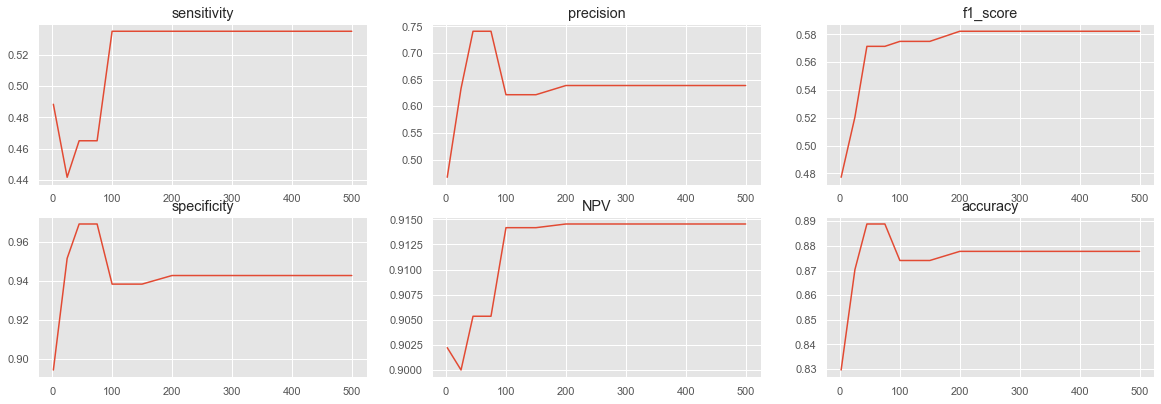

In [69]:
result=para_m_n_checker('dt','min_samples_split',mini,X_train,y_train,X_valid, y_valid,random_state=45)

In [70]:
from sklearn import tree
dt_model=tree.DecisionTreeClassifier(min_samples_split=200,random_state=45)

t0 = time()
dt_model.fit(X_train, y_train)
dt_traintime=round(time()-t0, 3)
print("Training Time:",dt_traintime , "s")

t0 = time()
y_pred_dt = dt_model.predict(X_valid)
dt_predicttime=round(time()-t0, 3)
print("prediction Time:",dt_predicttime , "s") 
print('__________________________________________\n')



from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score
dt_f1=f1_score(y_valid, y_pred_dt )
dt_acc=dt_model.score(X_valid, y_valid)
dt_sens,dt_spec,dt_pre,dt_npv=sens_spec_score(y_valid, y_pred_dt )

print('sensitivity: {}'.format(dt_sens))
print('specificity: {}'.format(dt_spec))
print('precision: {}'.format(dt_pre))
print('npv: {}'.format(dt_npv))
print('f1_score: {}'.format(dt_f1))

print('__________________________________________\n')
print('Accuracy on train data: {}'.format(dt_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(dt_acc))

Training Time: 0.007 s
prediction Time: 0.003 s
__________________________________________

sensitivity: 0.5348837209302325
specificity: 0.9427312775330396
precision: 0.6388888888888888
npv: 0.9145299145299145
f1_score: 0.5822784810126581
__________________________________________

Accuracy on train data: 0.8825396825396825
Accuracy on test data: 0.8777777777777778



min_sample_split of 200 has the best  sensitivity but accuracy and presision dropped drastically when compared to min_sample_split of 75.

Depending on what we want, min_sample_split of 200  might be our best choice

**Random Forest Model**

In [71]:
mini=[2,25,45,50,75,100,125,150,175,200]

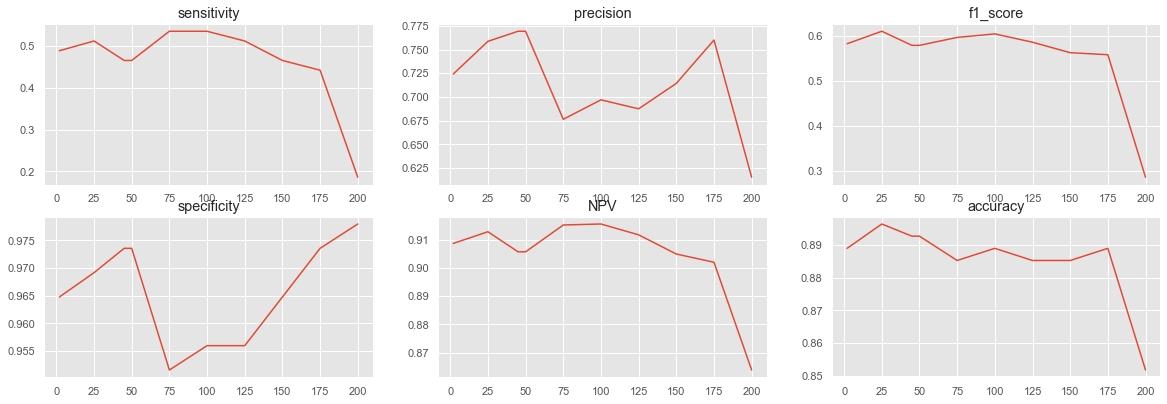

In [72]:
result=para_m_n_checker('rfr','min_samples_split',mini,X_train,y_train,X_valid, y_valid,random_state=45)

75 is the best min_samples_split

In [73]:
mini=[10,50,100,150,200,300,400,500,600,700,800,900,1000]

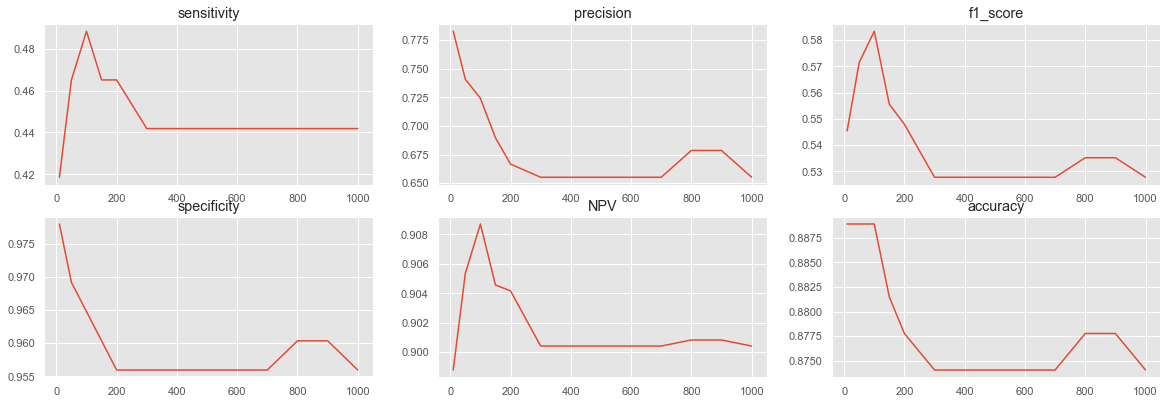

In [74]:
result=para_m_n_checker('rfr','n_estimators',mini,X_train,y_train,X_valid, y_valid,random_state=45)

100 is the best for n_estimators

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=45)     # n_estimators=100, max_depth=10, random_state = 0)
t0 = time()
rf_model.fit(X_train, y_train)
rf_traintime=round(time()-t0, 3)
print("Training Time:",rf_traintime , "s")

t0 = time()
y_pred_rf = rf_model.predict(X_valid)
rf_predicttime=round(time()-t0, 3)
print("prediction Time:",rf_predicttime , "s") 
print('__________________________________________\n')



from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score
rf_f1=f1_score(y_valid, y_pred_rf )
rf_acc=rf_model.score(X_valid, y_valid)
rf_sens,rf_spec,rf_pre,rf_npv=sens_spec_score(y_valid, y_pred_rf )

print('sensitivity: {}'.format(rf_sens))
print('specificity: {}'.format(rf_spec))
print('precision: {}'.format(rf_pre))
print('npv: {}'.format(rf_npv))
print('f1_score: {}'.format(rf_f1))

print('__________________________________________\n')
print('Accuracy on train data: {}'.format(rf_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(rf_acc))

Training Time: 0.19 s
prediction Time: 0.017 s
__________________________________________

sensitivity: 0.4883720930232558
specificity: 0.9647577092511013
precision: 0.7241379310344828
npv: 0.9087136929460581
f1_score: 0.5833333333333334
__________________________________________

Accuracy on train data: 1.0
Accuracy on test data: 0.8888888888888888


In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(min_samples_split=75,random_state=45)     # n_estimators=100, max_depth=10, random_state = 0)
t0 = time()
rf_model.fit(X_train, y_train)
rf_traintime=round(time()-t0, 3)
print("Training Time:",rf_traintime , "s")

t0 = time()
y_pred_rf = rf_model.predict(X_valid)
rf_predicttime=round(time()-t0, 3)
print("prediction Time:",rf_predicttime , "s") 
print('__________________________________________\n')



from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score
rf_f1=f1_score(y_valid, y_pred_rf )
rf_acc=rf_model.score(X_valid, y_valid)
rf_sens,rf_spec,rf_pre,rf_npv=sens_spec_score(y_valid, y_pred_rf )

print('sensitivity: {}'.format(rf_sens))
print('specificity: {}'.format(rf_spec))
print('precision: {}'.format(rf_pre))
print('npv: {}'.format(rf_npv))
print('f1_score: {}'.format(rf_f1))

print('__________________________________________\n')
print('Accuracy on train data: {}'.format(rf_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(rf_acc))

Training Time: 0.169 s
prediction Time: 0.015 s
__________________________________________

sensitivity: 0.5348837209302325
specificity: 0.9515418502202643
precision: 0.6764705882352942
npv: 0.9152542372881356
f1_score: 0.5974025974025974
__________________________________________

Accuracy on train data: 0.8873015873015873
Accuracy on test data: 0.8851851851851852


In [77]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,min_samples_split=75,random_state=45)     # n_estimators=100, max_depth=10, random_state = 0)
t0 = time()
rf_model.fit(X_train, y_train)
rf_traintime=round(time()-t0, 3)
print("Training Time:",rf_traintime , "s")

t0 = time()
y_pred_rf = rf_model.predict(X_valid)
rf_predicttime=round(time()-t0, 3)
print("prediction Time:",rf_predicttime , "s") 
print('__________________________________________\n')



from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score
rf_f1=f1_score(y_valid, y_pred_rf )
rf_acc=rf_model.score(X_valid, y_valid)
rf_sens,rf_spec,rf_pre,rf_npv=sens_spec_score(y_valid, y_pred_rf )

print('sensitivity: {}'.format(rf_sens))
print('specificity: {}'.format(rf_spec))
print('precision: {}'.format(rf_pre))
print('npv: {}'.format(rf_npv))
print('f1_score: {}'.format(rf_f1))

print('__________________________________________\n')
print('Accuracy on train data: {}'.format(rf_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(rf_acc))

Training Time: 0.175 s
prediction Time: 0.015 s
__________________________________________

sensitivity: 0.5348837209302325
specificity: 0.9515418502202643
precision: 0.6764705882352942
npv: 0.9152542372881356
f1_score: 0.5974025974025974
__________________________________________

Accuracy on train data: 0.8873015873015873
Accuracy on test data: 0.8851851851851852


**Ada Boost Model**

In [78]:
mini=[10,50,100,150,200,300,400,500,600,700,800,900,1000]

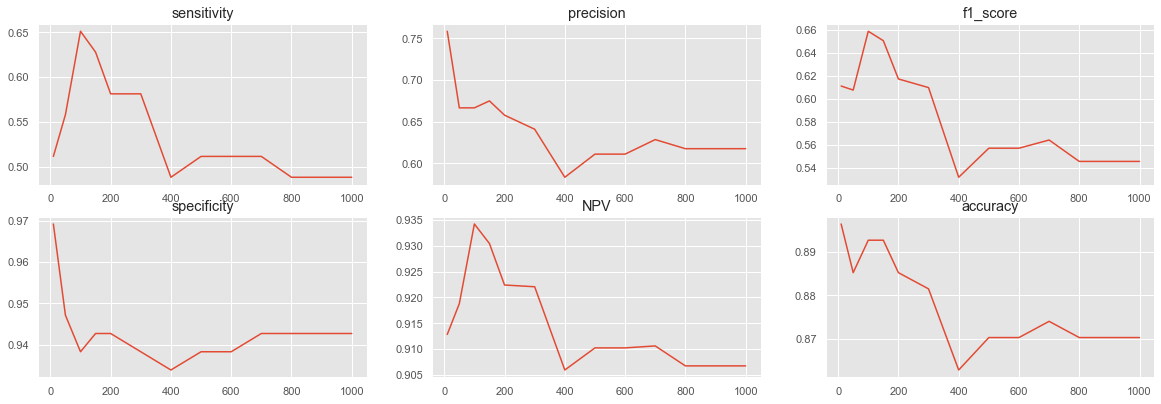

In [79]:
result=para_m_n_checker('ada','n_estimators',mini,X_train,y_train,X_valid, y_valid,random_state=45)

100 is also the best for n_estimators

In [80]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100,random_state=0)   # n_estimators=100, max_depth=10, random_state = 0)
t0 = time()
ada_model.fit(X_train, y_train)
ada_traintime=round(time()-t0, 3)
print("Training Time:",ada_traintime , "s")

t0 = time()
y_pred_ada= ada_model.predict(X_valid)
ada_predicttime=round(time()-t0, 3)
print("prediction Time:",ada_predicttime , "s") 
print('__________________________________________\n')



from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score
ada_f1=f1_score(y_valid, y_pred_ada)
ada_acc=ada_model.score(X_valid, y_valid)
ada_sens,ada_spec,ada_pre,ada_npv=sens_spec_score(y_valid, y_pred_ada)

print('sensitivity: {}'.format(ada_sens))
print('specificity: {}'.format(ada_spec))
print('precision: {}'.format(ada_pre))
print('npv: {}'.format(ada_npv))
print('f1_score: {}'.format(ada_f1))

print('__________________________________________\n')
print('Accuracy on train data: {}'.format(ada_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(ada_acc))

Training Time: 0.168 s
prediction Time: 0.017 s
__________________________________________

sensitivity: 0.6511627906976745
specificity: 0.9383259911894273
precision: 0.6666666666666666
npv: 0.9342105263157895
f1_score: 0.6588235294117646
__________________________________________

Accuracy on train data: 0.9222222222222223
Accuracy on test data: 0.8925925925925926


**XGBoost Model**


In [81]:
mini=[10,50,100,150,200,300,400,500,600,700,800,900,1000]

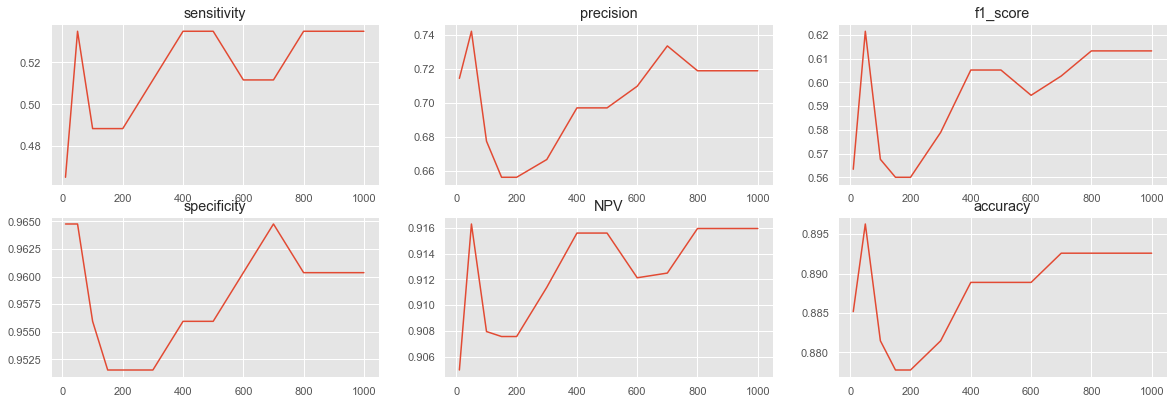

In [82]:
result=para_m_n_checker('xg','n_estimators',mini,X_train,y_train,X_valid, y_valid,random_state=45)

50 is also the best for n_estimators

In [83]:
from xgboost import XGBClassifier
xg_model = XGBClassifier(n_estimators=50)     # n_estimators=100, max_depth=10, random_state = 0)
t0 = time()
xg_model.fit(X_train, y_train)
xg_traintime=round(time()-t0, 3)
print("Training Time:",xg_traintime , "s")

t0 = time()
y_pred_xg= xg_model.predict(X_valid)
xg_predicttime=round(time()-t0, 3)
print("prediction Time:",xg_predicttime , "s") 
print('__________________________________________\n')



from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score,precision_score, recall_score
xg_f1=f1_score(y_valid, y_pred_xg)
xg_acc=xg_model.score(X_valid, y_valid)
xg_sens,xg_spec,xg_pre,xg_npv=sens_spec_score(y_valid, y_pred_xg)

print('sensitivity: {}'.format(xg_sens))
print('specificity: {}'.format(xg_spec))
print('precision: {}'.format(xg_pre))
print('npv: {}'.format(xg_npv))
print('f1_score: {}'.format(xg_f1))

print('__________________________________________\n')
print('Accuracy on train data: {}'.format(xg_model.score(X_train, y_train)))
print('Accuracy on test data: {}'.format(xg_acc))

Training Time: 0.074 s
prediction Time: 0.005 s
__________________________________________

sensitivity: 0.5348837209302325
specificity: 0.9647577092511013
precision: 0.7419354838709677
npv: 0.9163179916317992
f1_score: 0.6216216216216216
__________________________________________

Accuracy on train data: 1.0
Accuracy on test data: 0.8962962962962963


In [84]:
b=['sensitivity','specificity','precision','npv','f1_score','accuracy']
nm=['lr','svm','nb','dt','rf','ada','xg']

In [85]:
model_results=[
    [lr_sens,lr_spec,lr_pre,lr_npv,lr_f1,lr_acc],
    [svm_sens,svm_spec,svm_pre,svm_npv,svm_f1,svm_acc],
    [nb_sens,nb_spec,nb_pre,nb_npv,nb_f1,nb_acc],
    [dt_sens,dt_spec,dt_pre,dt_npv,dt_f1,dt_acc],
    [rf_sens,rf_spec,rf_pre,rf_npv,rf_f1,rf_acc],
    [ada_sens,ada_spec,ada_pre,ada_npv,ada_f1,ada_acc],
    [xg_sens,xg_spec,xg_pre,xg_npv,xg_f1,xg_acc],
]

In [86]:
result_df=pd.DataFrame(model_results,columns=b, index=nm).sort_values(by=['f1_score'], ascending=False)
result_df.head()

,sensitivity,specificity,precision,npv,f1_score,accuracy
ada,0.651163,0.938326,0.666667,0.934211,0.658824,0.892593
lr,0.604651,0.955947,0.722222,0.927350,0.658228,0.900000
nb,0.581395,0.960352,0.735294,0.923729,0.649351,0.900000
xg,0.534884,0.964758,0.741935,0.916318,0.621622,0.896296
rf,0.534884,0.951542,0.676471,0.915254,0.597403,0.885185


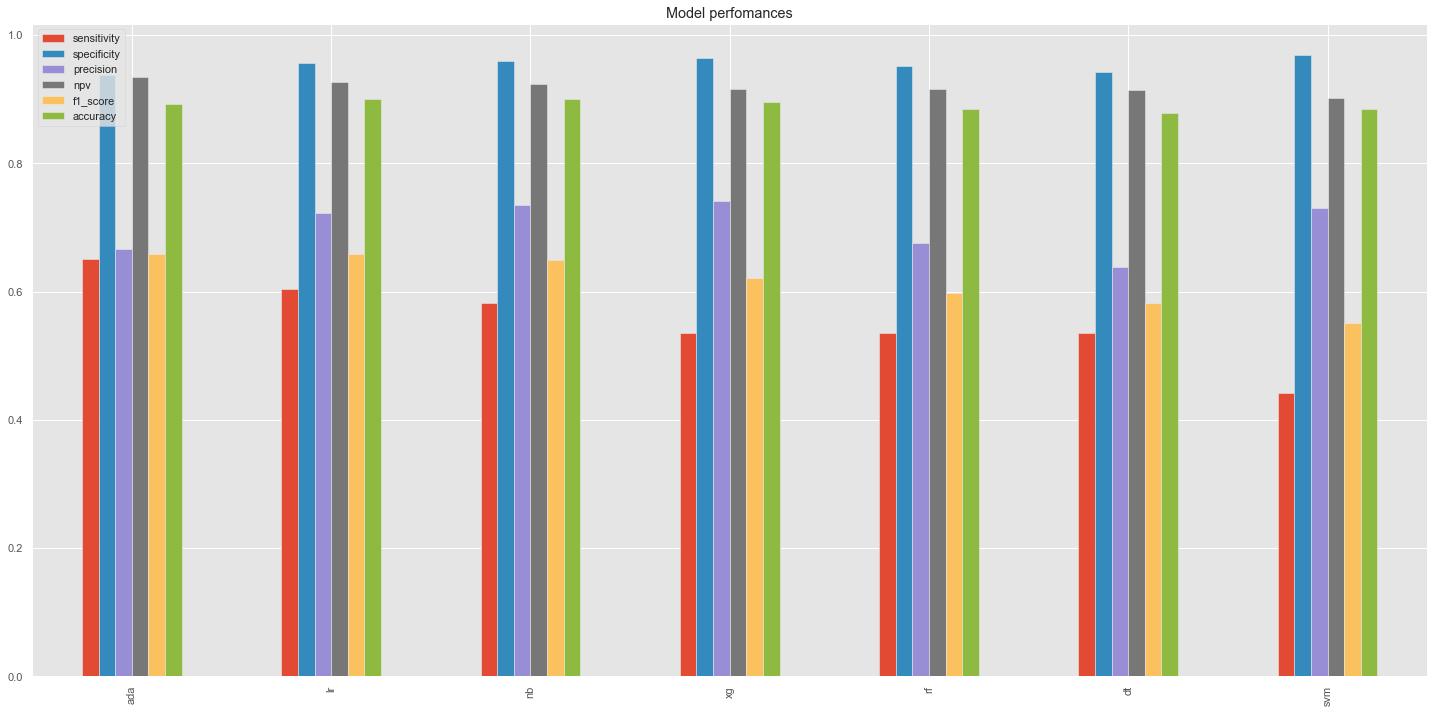

In [87]:
result_df.plot(kind='bar',figsize=(25,12))
plt.title('Model perfomances')
plt.show()

In [88]:
result_df

,sensitivity,specificity,precision,npv,f1_score,accuracy
ada,0.651163,0.938326,0.666667,0.934211,0.658824,0.892593
lr,0.604651,0.955947,0.722222,0.927350,0.658228,0.900000
nb,0.581395,0.960352,0.735294,0.923729,0.649351,0.900000
xg,0.534884,0.964758,0.741935,0.916318,0.621622,0.896296
rf,0.534884,0.951542,0.676471,0.915254,0.597403,0.885185
dt,0.534884,0.942731,0.638889,0.914530,0.582278,0.877778
svm,0.441860,0.969163,0.730769,0.901639,0.550725,0.885185


**Conclusion**

**Logistic regresion** seems to be the best because although it has second to best sensitivity,f1_score and NVP, it still maintained its precision, accuracy and specificity to an extent but if in case if there is a need for higher specificity, we will use **Naive Bayes**.

**There's actually a need for high sensitivity because if there is high sensitivity, we won't loose any customer by mispredicting them as won't churn instead of churn.**

**Hence Adaboost will be used.**